In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, classification_report

In [2]:
df = pd.read_csv('data/placement.csv',index_col=0)
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   cgpa       100 non-null    float64
 1   iq         100 non-null    float64
 2   placement  100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 3.1 KB


In [4]:
df['cgpa'].nunique()

39

In [5]:
df['cgpa'].unique()

array([6.8, 5.9, 5.3, 7.4, 5.8, 7.1, 5.7, 5. , 6.1, 5.1, 6. , 6.9, 5.4,
       6.4, 5.2, 3.3, 4. , 6.6, 4.9, 4.7, 7. , 7.6, 3.9, 4.8, 8.1, 6.5,
       4.6, 7.5, 3.5, 8.3, 7.8, 8. , 7.3, 6.3, 8.5, 6.7, 4.4, 4.3, 6.2])

In [6]:
df['cgpa'].value_counts()

cgpa
4.9    6
6.1    5
5.2    5
6.0    5
7.0    5
5.7    4
6.8    4
7.3    4
5.4    4
6.5    4
4.8    4
7.5    3
4.7    3
5.1    3
6.3    3
5.0    3
6.9    3
4.0    2
7.1    2
5.3    2
4.4    2
5.8    2
6.4    2
6.7    2
8.1    2
6.6    2
7.6    2
7.4    1
5.9    1
3.9    1
3.3    1
7.8    1
8.3    1
3.5    1
4.6    1
8.5    1
8.0    1
4.3    1
6.2    1
Name: count, dtype: int64

In [7]:
df['iq'].std()

39.94419845107659

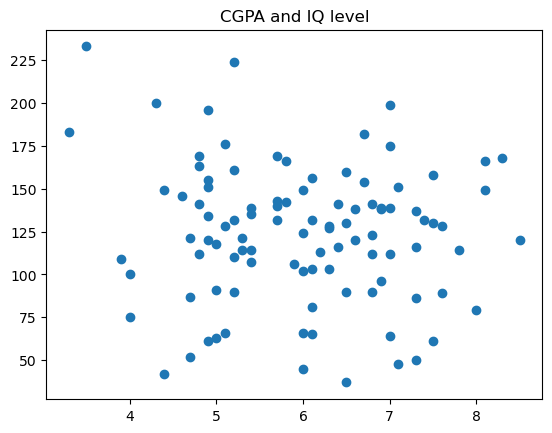

In [8]:
plt.title("CGPA and IQ level")
plt.scatter(df['cgpa'],df['iq'])
plt.show()

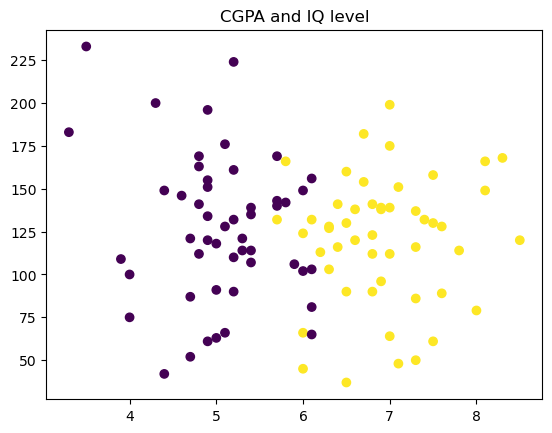

In [9]:
plt.title("CGPA and IQ level")
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])
plt.show()

In [10]:
X=df.drop(columns=['placement'])
y= df['placement']

In [11]:
# train train split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=40)

In [12]:
X_train

,cgpa,iq
72,7.3,116.0
66,6.9,96.0
69,8.5,120.0
67,5.0,118.0
26,7.0,199.0
...,...,...
56,6.1,65.0
37,8.1,149.0
7,5.0,63.0
91,7.5,158.0


In [13]:
X_test

,cgpa,iq
79,6.5,90.0
75,4.8,169.0
63,6.3,128.0
15,5.1,176.0
38,6.5,160.0
11,6.9,138.0
40,4.9,134.0
45,6.0,66.0
39,4.6,146.0
62,6.0,102.0


In [14]:
y_train

72    1
66    1
69    1
67    0
26    1
     ..
56    0
37    1
7     0
91    1
70    1
Name: placement, Length: 80, dtype: int64

In [15]:
y_test

79    1
75    0
63    1
15    0
38    1
11    1
40    0
45    1
39    0
62    0
86    0
4     0
47    0
27    1
81    0
17    0
82    1
33    0
9     0
92    0
Name: placement, dtype: int64

In [16]:
from sklearn.preprocessing import StandardScaler
sclarer = StandardScaler()
X_train=sclarer.fit_transform(X_train)
X_train

array([[ 1.01957542e+00, -1.75050227e-01],
       [ 6.80070598e-01, -6.73413861e-01],
       [ 2.03808989e+00, -7.53774997e-02],
       [-9.32577310e-01, -1.25213863e-01],
       [ 7.64946804e-01,  1.89315886e+00],
       [-1.78133937e+00, -1.19669568e+00],
       [ 1.01957542e+00, -1.81965022e+00],
       [-6.77948693e-01, -5.04593180e-02],
       [-1.01745352e+00,  7.96758861e-01],
       [-1.01745352e+00,  1.81840431e+00],
       [ 4.25441981e-01, -7.53774997e-02],
       [ 7.64946804e-01,  3.98067953e-01],
       [-1.10232972e+00,  4.47904317e-01],
       [ 5.95194392e-01, -6.22954543e-04],
       [ 2.55689570e-01,  4.47904317e-01],
       [-8.38152531e-02, -1.94424113e+00],
       [-3.38443870e-01,  4.22986135e-01],
       [ 8.49823009e-01,  6.97086134e-01],
       [ 4.25441981e-01,  3.73149771e-01],
       [-3.38443870e-01,  4.97740680e-01],
       [ 1.01957542e+00,  3.48231590e-01],
       [ 1.01957542e+00, -9.22595679e-01],
       [-9.32577310e-01, -7.98004770e-01],
       [ 7.

In [17]:
X_test = sclarer.transform(X_test)

In [18]:
X_test

array([[ 0.34056578, -0.82292295],
       [-1.10232972,  1.14561341],
       [ 0.17081336,  0.12396795],
       [-0.8477011 ,  1.32004068],
       [ 0.34056578,  0.92134977],
       [ 0.6800706 ,  0.37314977],
       [-1.01745352,  0.27347704],
       [-0.08381525, -1.42095931],
       [-1.27208213,  0.57249523],
       [-0.08381525, -0.52390477],
       [-0.8477011 ,  0.12396795],
       [-0.25356766,  0.4728225 ],
       [-0.7628249 ,  0.94626795],
       [-0.08381525,  0.02429523],
       [-0.59307249, -0.39931386],
       [-2.37547281,  1.49446795],
       [ 0.34056578, -2.14358658],
       [-0.08381525,  0.64724977],
       [-0.8477011 , -1.42095931],
       [-0.7628249 , -0.32455932]])

In [19]:
from sklearn.linear_model import LogisticRegression

In [20]:
clf = LogisticRegression()
clf.fit(X_train,y_train)

LogisticRegression()

In [21]:
y_pred = clf.predict(X_test)
y_pred

array([1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0])

In [22]:
pd.DataFrame({'y_test':y_test,'y_predict':y_pred})

,y_test,y_predict
79,1,1
75,0,0
63,1,1
15,0,0
38,1,1
11,1,1
40,0,0
45,1,0
39,0,0
62,0,1


In [23]:
df['placement'].value_counts()

placement
1    50
0    50
Name: count, dtype: int64

In [24]:
print("Accuracy Score:",accuracy_score(y_test,y_pred))
print("Precision Score:",precision_score(y_test,y_pred))
print("Recall Score:",recall_score(y_test,y_pred))
print("F1 Score:",f1_score(y_test,y_pred))

Accuracy Score: 0.85
Precision Score: 0.75
Recall Score: 0.8571428571428571
F1 Score: 0.8


In [25]:
print("Confusion Matrix:",confusion_matrix(y_test,y_pred))
print("Classification Report:",classification_report(y_test,y_pred))

Confusion Matrix: [[11  2]
 [ 1  6]]
Classification Report:               precision    recall  f1-score   support

           0       0.92      0.85      0.88        13
           1       0.75      0.86      0.80         7

    accuracy                           0.85        20
   macro avg       0.83      0.85      0.84        20
weighted avg       0.86      0.85      0.85        20



In [26]:
import seaborn as sns

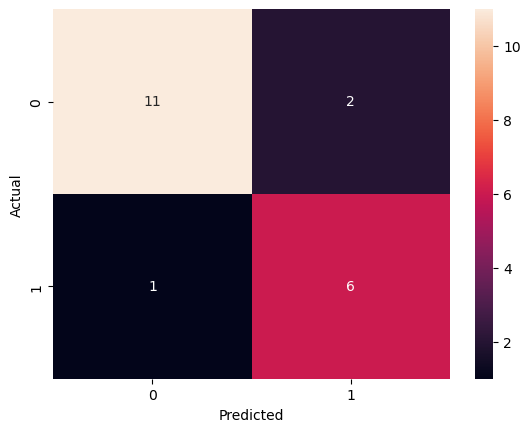

In [27]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

<Axes: >

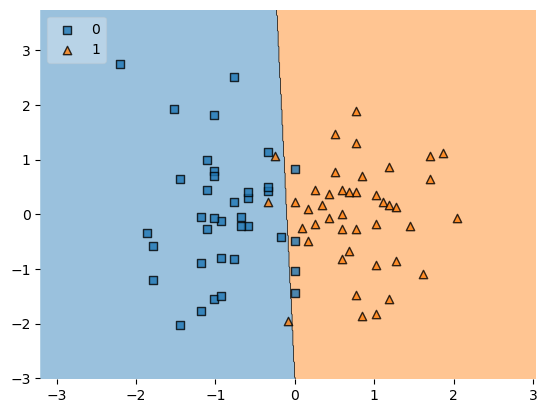

In [28]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X_train, y_train.values, clf=clf, legend=2)

<Axes: >

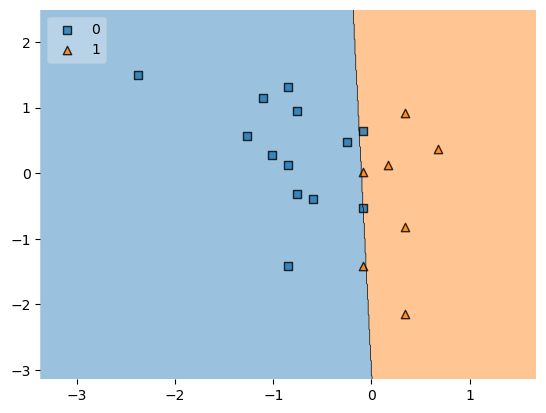

In [34]:
#%pip install mlxtend
plot_decision_regions(X_test, y_test.values, clf=clf, legend=2)